Lets import the needed modules for preprocessing.

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

Now we will load the dataset using pandas.

In [3]:
data=pd.read_csv('./data/housing.csv',sep=',',thousands=',')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


This is a first look on the dataset columns (a view of the first 5 records).
Lets see the names of the features and the shape of the dataset.

In [4]:
data.columns,data.shape

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity'],
       dtype='object'),
 (20640, 10))

Our dataset is comprised of 20640 records with 10 features per record.
Now lets which features are categorical and see each unique value per feature.

In [5]:
nominal = data.select_dtypes(exclude=["number","bool_"])
print("Unique values per nominal/categorical columns:")
for column in nominal.columns:
    print("------")
    print(column,":",getattr(nominal,column).unique())

Unique values per nominal/categorical columns:
------
ocean_proximity : ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


As we can see , the only categorical feature is ocean_proximity , which has 5 unique values.
Lets get some info about the rest numeric features.

In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Let's check if there are any missing values.

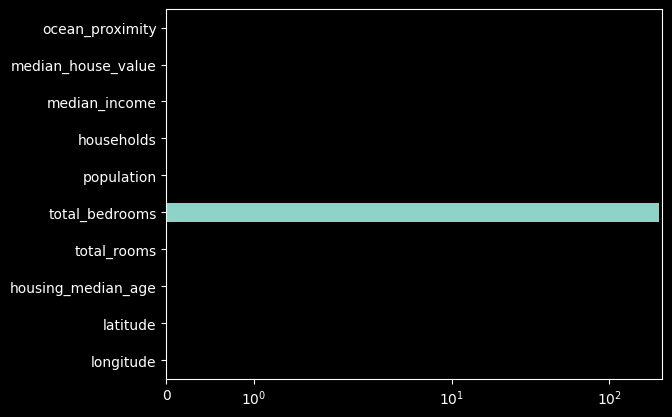

In [7]:
fig, ax = plt.subplots(1, 1)
data.isna().sum().plot.barh(ax=ax)

ax.set_xscale('symlog')

As we can see , the only feature with missing values is total_bedrooms.
We will replace every missing value with the mean of the feature.

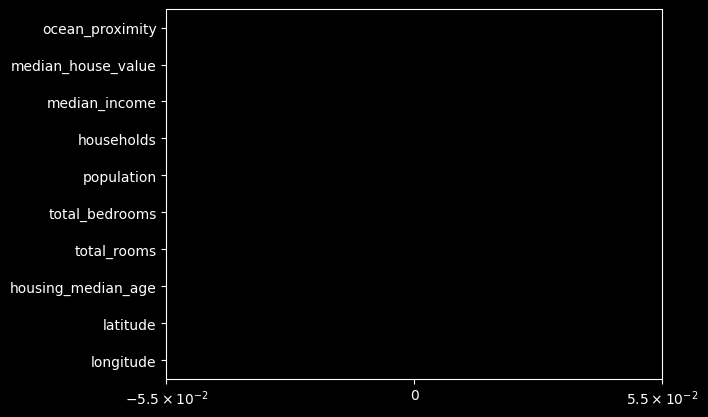

In [8]:
values={"total_bedrooms":data["total_bedrooms"].mean()}
data.fillna(values,inplace=True)
fig, ax = plt.subplots(1, 1)
data.isna().sum().plot.barh(ax=ax)

ax.set_xscale('symlog')

As we can see , we have no missing values now.
Now we want to get a better view of our data through plots.
I will create a density plot and a histogram per feature.

In [9]:
data.select_dtypes(['number']).columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

We have 9 numeric fields

In [10]:
num_feats=data.select_dtypes(['number']).columns 

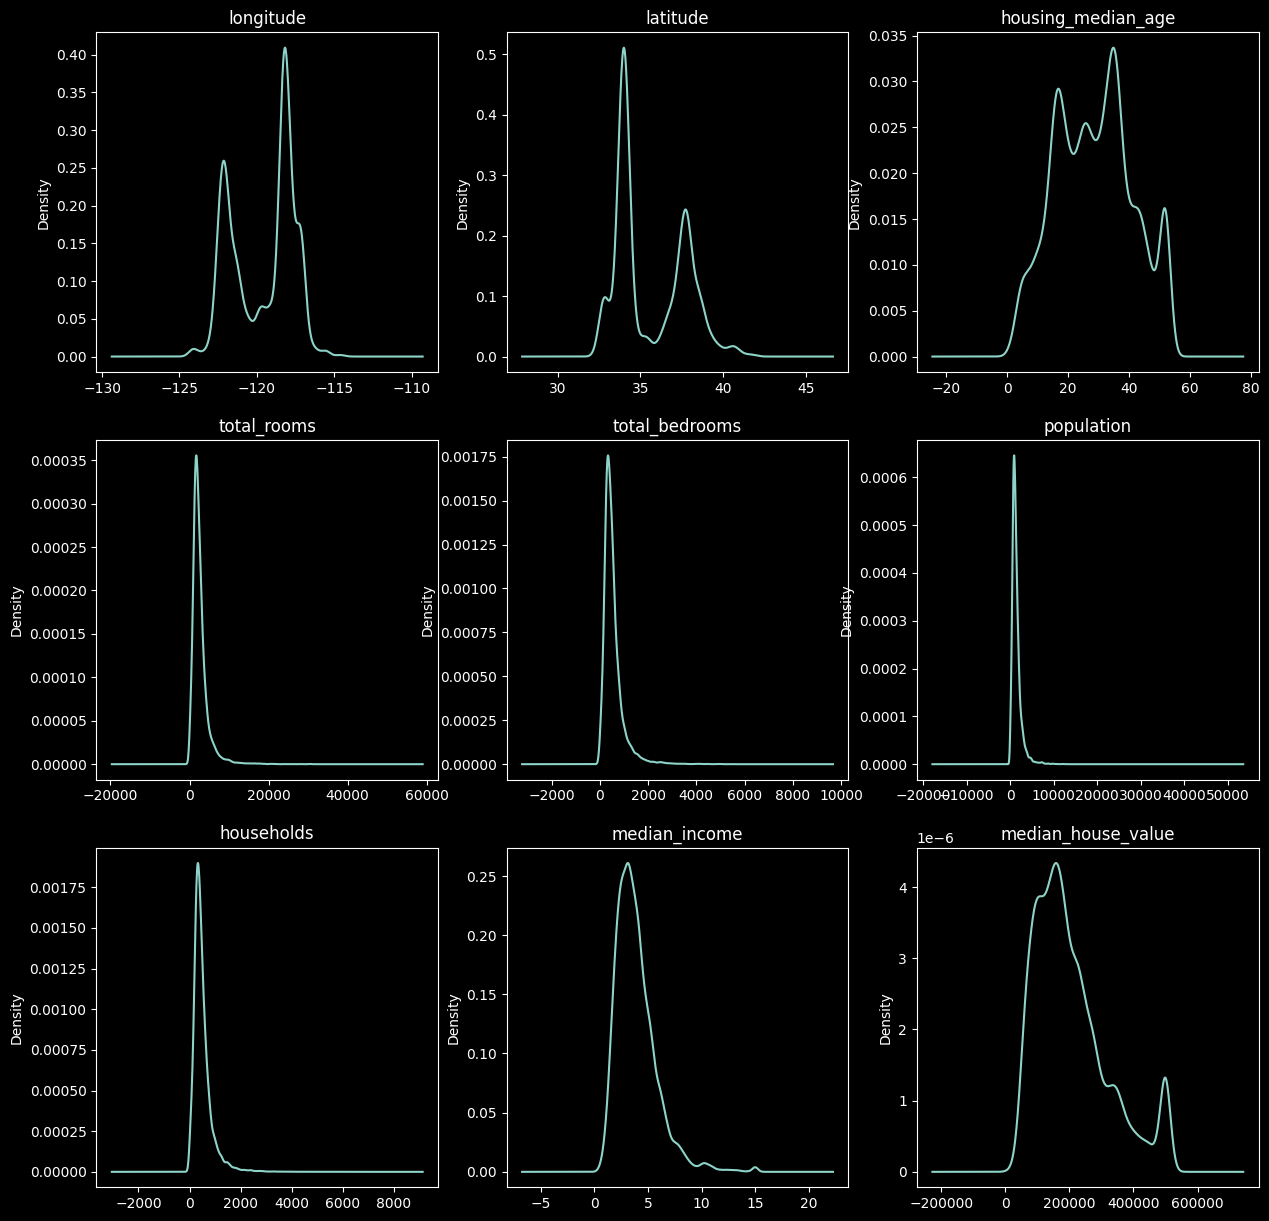

In [11]:
fig,ax=plt.subplots(3,3,figsize=(15,15))

for idx, (ax_i, feat) in enumerate(zip(ax.flatten(), num_feats)):
    data[feat].plot.density(ax=ax_i)
    ax_i.set_title(feat)

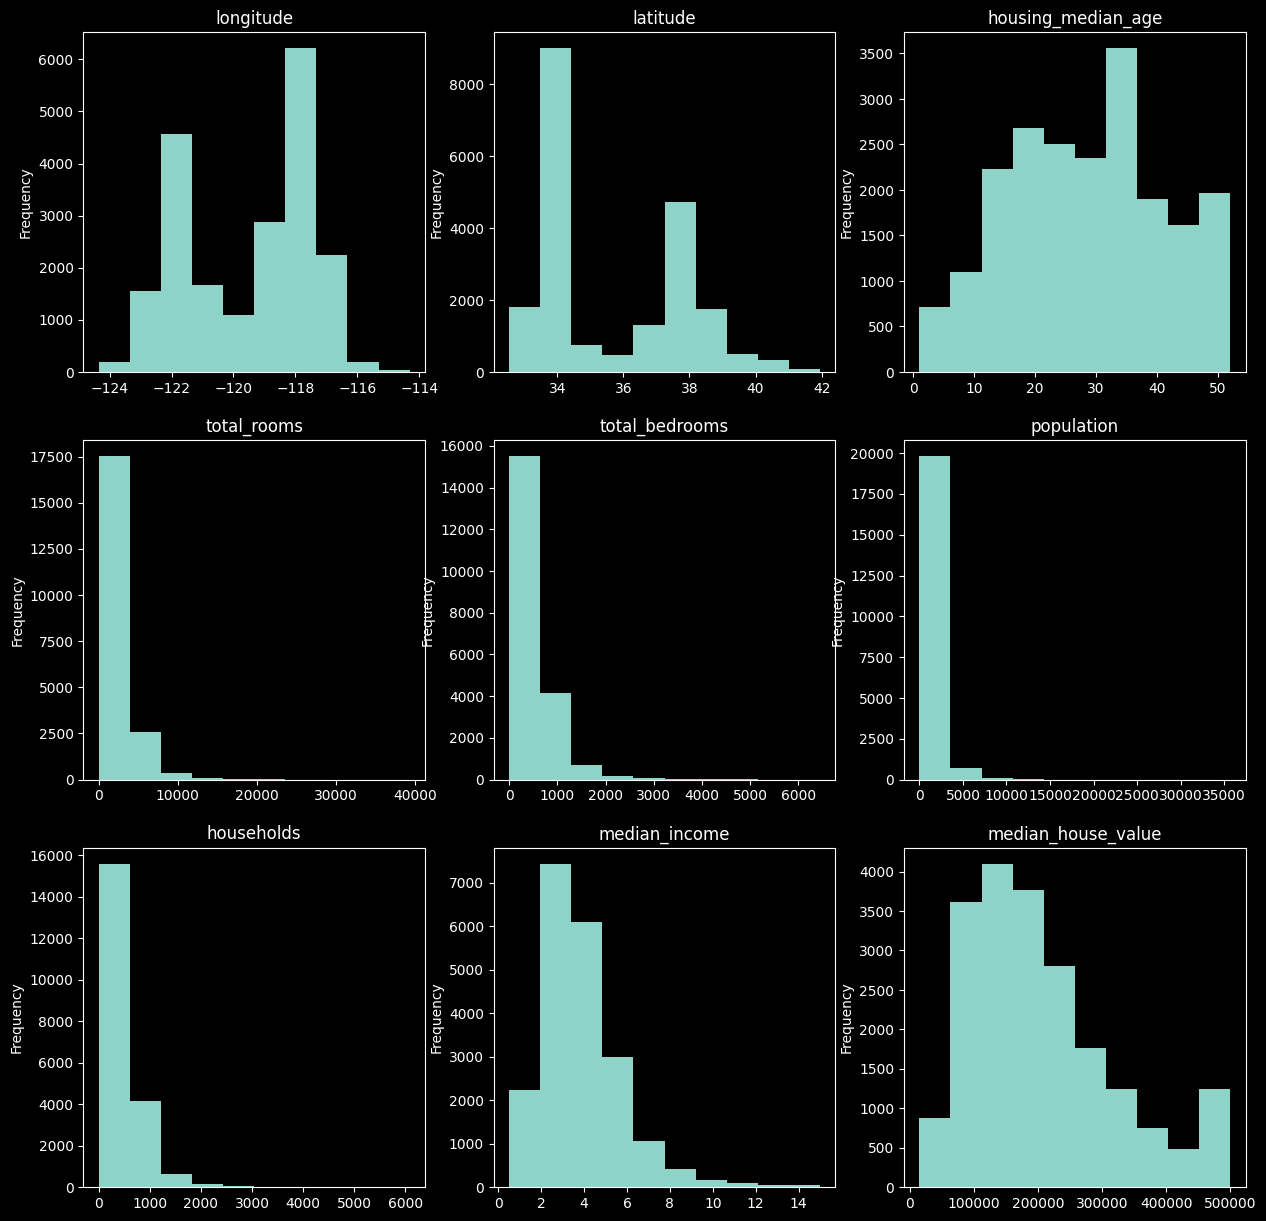

In [12]:
fig,ax=plt.subplots(3,3,figsize=(15,15))

for idx, (ax_i, feat) in enumerate(zip(ax.flatten(), num_feats)):
    data[feat].plot.hist(ax=ax_i)
    ax_i.set_title(feat)

Now we can create the covariance and correlation matrix of the dataset to see the variance between each pair of numeric features and which features are correlated.

<Axes: >

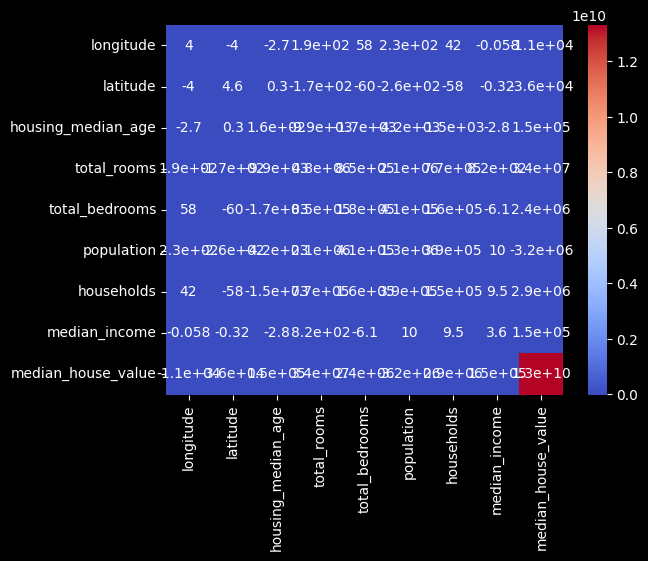

In [18]:
sns.heatmap(data.select_dtypes('number').cov(), cmap='coolwarm', annot=True)

<Axes: >

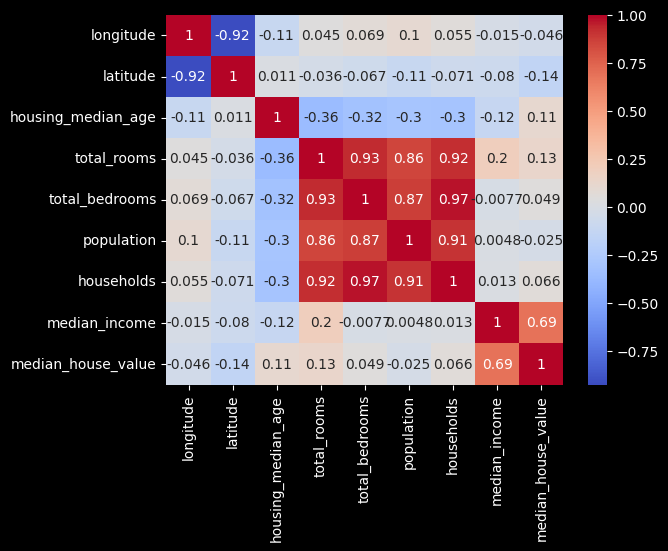

In [19]:
sns.heatmap(data.select_dtypes('number').corr(method='pearson'), cmap='coolwarm', annot=True)

As we can see , the features total rooms - total bedrooms , total rooms - households , total bedrooms - households , population - households , population - total rooms , population - total bedrooms are heavily correlated.This means we later on we can combine some of these pairs since they hold similar information.

Now we can try to draw some scatter plots for these correlated features and try to create a linear approximation of all of these features.

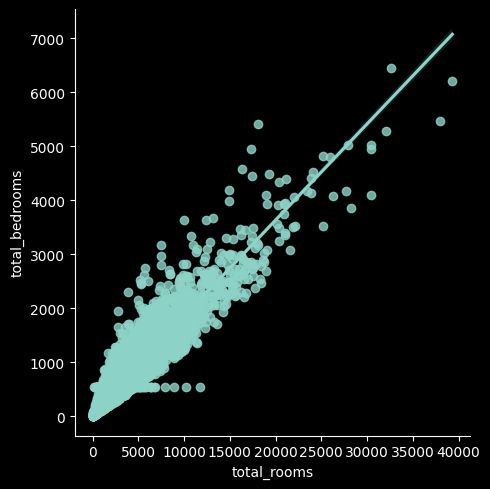

In [20]:
sns.lmplot(x='total_rooms',y='total_bedrooms',data=data,)

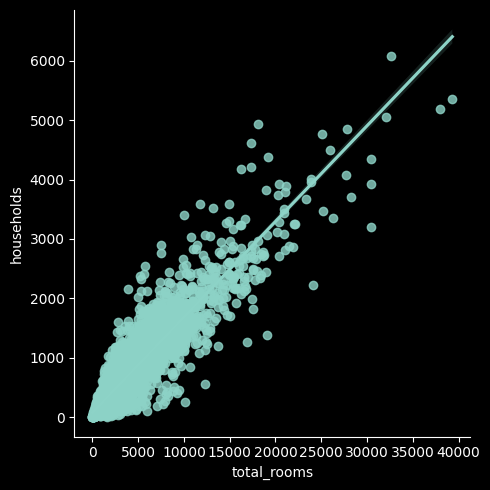

In [21]:
sns.lmplot(x='total_rooms',y='households',data=data,)

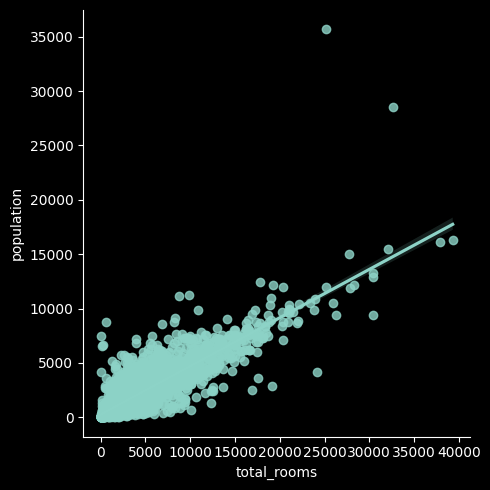

In [22]:
sns.lmplot(x='total_rooms',y='population',data=data,)

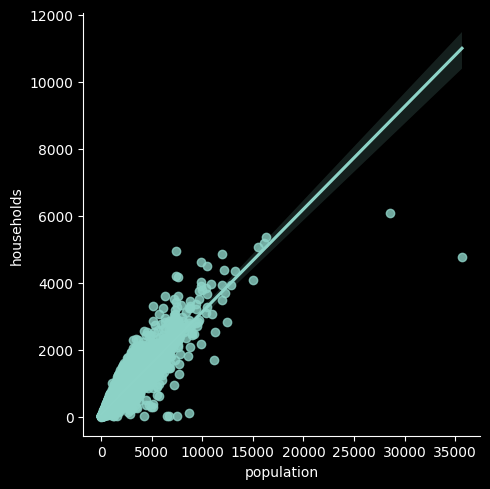

In [23]:
sns.lmplot(x='population',y='households',data=data,)

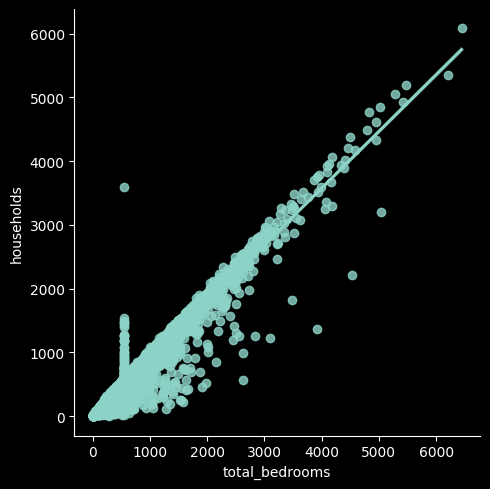

In [26]:
sns.lmplot(x='total_bedrooms',y='households',data=data,)

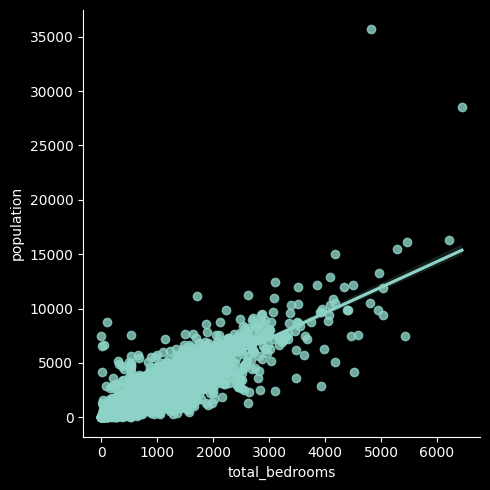

In [27]:
sns.lmplot(x='total_bedrooms',y='population',data=data,)